In [ ]:
import gdown
import pandas as pd
import os
file_id = "1sQJs53Qk3v35YnX40UfqWrSWQIcatykS"
url = f"https://drive.google.com/uc?id={file_id}"
output = "US_Accidents.csv"
if not os.path.exists(output):
    gdown.download(url, output, quiet=False)
    print("Downloaded from Google Drive")
else:
    print("File already exists locally")
    
df = pd.read_csv(output)
print("Shape:", df.shape)
df.head()


In [ ]:
1.How many unique values are there in categorical columns like City, State, and Weather_Condition? Which category is the most frequent in each?

In [4]:
import pandas as pd
categorical_cols = ["City", "State", "Weather_Condition"]
results = {}
for col in categorical_cols:
    unique_vals = df[col].nunique()
    top_category = df[col].value_counts().idxmax()
    top_freq = df[col].value_counts().max()
    
    results[col] = {
        "Unique Values": unique_vals,
        "Most Frequent Category": top_category,
        "Frequency": top_freq
    }
pd.DataFrame(results).T


,Unique Values,Most Frequent Category,Frequency
City,7631,Houston,32476
State,47,CA,206889
Weather_Condition,99,Clear,208905


In [ ]:
2.Calculate the percentage of missing values in each column and list columns with more than 5% missing data.

In [10]:
import pandas as pd
missing_percent = (df.isnull().sum() / len(df)) * 100
missing_over_5 = missing_percent[missing_percent > 5].sort_values(ascending=False) # filtering above 5 percent data
print("Columns with more than 5% missing data:\n")
print(missing_over_5)


Columns with more than 5% missing data:

End_Lat              100.000000
End_Lng              100.000000
Precipitation(in)     65.249660
Wind_Chill(F)         63.735033
Wind_Speed(mph)       13.316912
dtype: float64


In [ ]:
3.Convert Start_Time and End_Time columns to datetime objects. Find the range (earliest and latest) of accident start times in the dataset.

In [14]:
import pandas as pd
df['Start_Time'] = pd.to_datetime(df['Start_Time'])
df['End_Time'] = pd.to_datetime(df['End_Time'])
start_min = df['Start_Time'].min()
start_max = df['Start_Time'].max()
print(f"Earliest accident start time: {start_min}")  # min start time
print(f"Latest accident start time: {start_max}")     # latest accident time


Earliest accident start time: 2016-02-08 05:46:00
Latest accident start time: 2022-09-08 17:56:22


In [ ]:
4.Identify any duplicate records in the dataset based on all columns. How many duplicates exist and how will you handle them?


In [19]:
import pandas as pd
duplicates = df.duplicated().sum()
print("Number of duplicate records:", duplicates)
if duplicates > 0:
    print("\nSample duplicate records:")
    display(df[df.duplicated()].head())
else:
    print("\nNo duplicate records found.")
df = df.drop_duplicates()

Number of duplicate records: 0

No duplicate records found.


In [ ]:
5.Explore the distribution of accident severity (Severity column). What percentage of accidents belong to each severity level? Visualize this distribution with a pie chart.

Percentage of accidents by severity level:
2    58.219346
3    36.203704
1     5.362878
4     0.214072
Name: Severity, dtype: float64


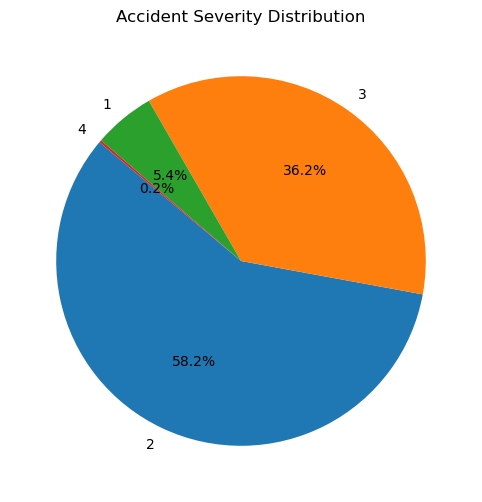

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
severity_counts = df['Severity'].value_counts(normalize=True) * 100  # severity
print("Percentage of accidents by severity level:")  # percentage of severity
print(severity_counts)
plt.figure(figsize=(8, 6))  # pie chart plot
severity_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Accident Severity Distribution')
plt.ylabel('')  
plt.show()
